<a href="https://colab.research.google.com/github/tntnu/20242R0136COSE41600/blob/main/20242R0136COSE41600.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install open3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.4 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7

Number of points: 184320
First 5 points:
[[-17.680988   10.233856    2.2256081]
 [-20.958332   12.19192     2.6414881]
 [-23.566381   13.77798     2.9739754]
 [-16.902227    9.9313545   2.1357174]
 [-16.289873    9.6194191   2.0609889]]
X coordinate range: -90.762093 to 59.585003
Y coordinate range: 0.0 to 148.38283
Z coordinate range: -1.2495099 to 9.1339064


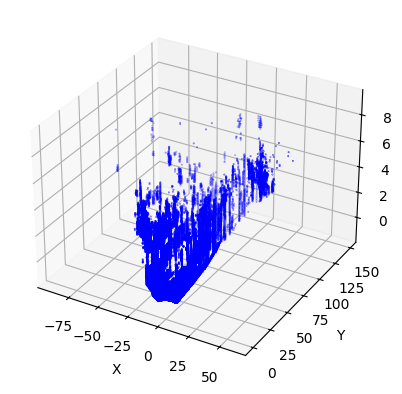

In [ ]:
# 시각화에 필요한 라이브러리 불러오기
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

# pcd 파일 불러오기, 필요에 맞게 경로 수정
file_path = "/content/drive/MyDrive/ColabNotebooks/20242R0136COSE41600/COSE416_HW1_tutorial/COSE416_HW1_tutorial/test_data/1727320101-665925967.pcd"

# PCD 파일 불러오기 및 데이터 확인 함수
def load_and_inspect_pcd(file_path):
    # PCD 파일 로드
    pcd = o3d.io.read_point_cloud(file_path)

    # 점 구름 데이터를 numpy 배열로 변환
    points = np.asarray(pcd.points)

    # 점 데이터 개수 및 일부 점 확인
    print(f"Number of points: {len(points)}")
    print("First 5 points:")
    print(points[:5])  # 처음 5개의 점 출력

    # 점의 x, y, z 좌표의 범위 확인
    print("X coordinate range:", np.min(points[:, 0]), "to", np.max(points[:, 0]))
    print("Y coordinate range:", np.min(points[:, 1]), "to", np.max(points[:, 1]))
    print("Z coordinate range:", np.min(points[:, 2]), "to", np.max(points[:, 2]))

    return points

# 점 구름 데이터 불러오기
points = load_and_inspect_pcd(file_path)

# Matplotlib를 사용한 3D 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 배경 이미지 설정 (예: 흰색 배경)
ax.set_facecolor('white')

# 점 구름 데이터 시각화
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=0.1, c='blue')

# 축 레이블 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [ ]:
# 시각화에 필요한 라이브러리 불러오기
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

# pcd 파일 불러오기, 필요에 맞게 경로 수정
file_path = "/content/drive/MyDrive/ColabNotebooks/20242R0136COSE41600/COSE416_HW1_tutorial/COSE416_HW1_tutorial/test_data/1727320101-665925967.pcd"
# PCD 파일 읽기
original_pcd = o3d.io.read_point_cloud(file_path)

# 빠른 연산 및 전처리를 위한 Voxel downsampling
voxel_size = 0.5  # 필요에 따라 voxel 크기를 조정하세요.
voxel_downsample_pcd = original_pcd.voxel_down_sample(voxel_size=voxel_size)

# Statistical Outlier Removal (SOR) 적용
cl, ind = voxel_downsample_pcd.remove_statistical_outlier(nb_neighbors=20, std_ratio=1.0)
sor_downsampled_pcd = voxel_downsample_pcd.select_by_index(ind)

# Radius Outlier Removal (ROR) 적용
cl, ind = voxel_downsample_pcd.remove_radius_outlier(nb_points=6, radius=1.0)
ror_downsampled_pcd = voxel_downsample_pcd.select_by_index(ind)

# 각 포인트 클라우드에 색상 지정
original_pcd.paint_uniform_color([0, 0, 0])
voxel_downsample_pcd.paint_uniform_color([0, 0.5, 1])  # 파랑
sor_downsampled_pcd.paint_uniform_color([1, 0, 0])  # 빨강
ror_downsampled_pcd.paint_uniform_color([0, 1, 0])  # 초록

# 포인트 클라우드 시각화 함수
def visualize_point_clouds(pcd_list, window_name="Point Cloud Visualization", point_size=1.0):
    vis = o3d.visualization.Visualizer()
    vis.create_window(window_name=window_name)
    for pcd in pcd_list:
        vis.add_geometry(pcd)
    vis.get_render_option().point_size = point_size
    vis.run()
    vis.destroy_window()

# 시각화 확인 (포인트 크기를 원하는 크기로 조절 가능)
visualize_point_clouds([original_pcd, voxel_downsample_pcd],
                       window_name="Original (Black), Voxel Downsampled (Red)", point_size=2.0)

visualize_point_clouds([original_pcd, sor_downsampled_pcd],
                       window_name="Original (Black), SOR (Blue)", point_size=2.0)

visualize_point_clouds([original_pcd, ror_downsampled_pcd],
                       window_name="Original (Black), ROR (Green)", point_size=2.0)



[Open3D WARNING] Failed to initialize GLFW


AttributeError: 'NoneType' object has no attribute 'point_size'

In [ ]:
# 시각화에 필요한 라이브러리 불러오기
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

# pcd 파일 불러오기, 필요에 맞게 경로 수정
file_path = "/content/drive/MyDrive/ColabNotebooks/20242R0136COSE41600/COSE416_HW1_tutorial/COSE416_HW1_tutorial/test_data/1727320101-665925967.pcd"
# PCD 파일 읽기
original_pcd = o3d.io.read_point_cloud(file_path)

# Voxel Downsampling 수행
voxel_size = 0.4  # 필요에 따라 voxel 크기를 조정
downsample_pcd = original_pcd.voxel_down_sample(voxel_size=voxel_size)

# Radius Outlier Removal (ROR) 적용
cl, ind = downsample_pcd.remove_radius_outlier(nb_points=6, radius=1.2)
ror_pcd = downsample_pcd.select_by_index(ind)

# RANSAC을 사용하여 평면 추정
plane_model, inliers = ror_pcd.segment_plane(distance_threshold=0.1,
                                             ransac_n=3,
                                             num_iterations=2000)

[a, b, c, d] = plane_model
print(f"Plane equation: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

# 도로에 속하는 포인트 (inliers)
road_pcd = ror_pcd.select_by_index(inliers)

# 도로에 속하지 않는 포인트 (outliers)
non_road_pcd = ror_pcd.select_by_index(inliers, invert=True)

# 도로 영역을 초록색으로 표시
road_pcd.paint_uniform_color([1, 0, 0])  # 빨간색으로 표시
# 도로가 아닌 포인트를 초록색으로 표시
non_road_pcd.paint_uniform_color([0, 1, 0])  # 녹색으로 표시

# 포인트 클라우드 시각화 함수
def visualize_point_clouds(pcd_list, window_name="Point Cloud Visualization", point_size=1.0):
    vis = o3d.visualization.Visualizer()
    vis.create_window(window_name=window_name)
    for pcd in pcd_list:
        vis.add_geometry(pcd)
    vis.get_render_option().point_size = point_size
    vis.run()
    vis.destroy_window()

# 두 영역을 동시에 시각화 (포인트 크기를 원하는 크기로 조절 가능)
visualize_point_clouds([road_pcd, non_road_pcd],
                       window_name="Road (Red) and Non-Road (Green) Points", point_size=2.0)



In [ ]:
# 시각화에 필요한 라이브러리 불러오기
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

# pcd 파일 불러오기, 필요에 맞게 경로 수정
file_path = "/content/drive/MyDrive/ColabNotebooks/20242R0136COSE41600/COSE416_HW1_tutorial/COSE416_HW1_tutorial/test_data/1727320101-665925967.pcd"
# PCD 파일 읽기
original_pcd = o3d.io.read_point_cloud(file_path)

# Voxel Downsampling 수행
voxel_size = 0.1  # 필요에 따라 voxel 크기를 조정
downsample_pcd = original_pcd.voxel_down_sample(voxel_size=voxel_size)

# Radius Outlier Removal (ROR) 적용
cl, ind = downsample_pcd.remove_radius_outlier(nb_points=6, radius=1.2)
ror_pcd = downsample_pcd.select_by_index(ind)

# RANSAC을 사용하여 평면 추정
plane_model, inliers = ror_pcd.segment_plane(distance_threshold=0.1,
                                             ransac_n=3,
                                             num_iterations=2000)

# 도로에 속하지 않는 포인트 (outliers) 추출
final_point = ror_pcd.select_by_index(inliers, invert=True)

# DBSCAN 클러스터링 적용
with o3d.utility.VerbosityContextManager(o3d.utility.VerbosityLevel.Debug) as cm:
    labels = np.array(final_point.cluster_dbscan(eps=0.6, min_points=11, print_progress=True))

# 각 클러스터를 색으로 표시
max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")

# 노이즈를 제거하고 각 클러스터에 색상 지정
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0  # 노이즈는 검정색으로 표시
final_point.colors = o3d.utility.Vector3dVector(colors[:, :3])

# 포인트 클라우드 시각화 함수
def visualize_point_cloud_with_point_size(pcd, window_name="Point Cloud Visualization", point_size=1.0):
    vis = o3d.visualization.Visualizer()
    vis.create_window(window_name=window_name)
    vis.add_geometry(pcd)
    vis.get_render_option().point_size = point_size
    vis.run()
    vis.destroy_window()

# 시각화 (포인트 크기를 원하는 크기로 조절 가능)
visualize_point_cloud_with_point_size(final_point,
                                      window_name="DBSCAN Clustered Points", point_size=2.0)



In [ ]:
# 시각화에 필요한 라이브러리 불러오기
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

# pcd 파일 불러오기, 필요에 맞게 경로 수정
file_path = "/content/drive/MyDrive/ColabNotebooks/20242R0136COSE41600/COSE416_HW1_tutorial/COSE416_HW1_tutorial/test_data/1727320101-665925967.pcd"
# PCD 파일 읽기
original_pcd = o3d.io.read_point_cloud(file_path)

# Voxel Downsampling 수행
voxel_size = 0.2  # 필요에 따라 voxel 크기를 조정하세요.
downsample_pcd = original_pcd.voxel_down_sample(voxel_size=voxel_size)

# Radius Outlier Removal (ROR) 적용
cl, ind = downsample_pcd.remove_radius_outlier(nb_points=6, radius=1.2)
ror_pcd = downsample_pcd.select_by_index(ind)

# RANSAC을 사용하여 평면 추정
plane_model, inliers = ror_pcd.segment_plane(distance_threshold=0.1,
                                             ransac_n=3,
                                             num_iterations=2000)

# 도로에 속하지 않는 포인트 (outliers) 추출
final_point = ror_pcd.select_by_index(inliers, invert=True)

# DBSCAN 클러스터링 적용
with o3d.utility.VerbosityContextManager(o3d.utility.VerbosityLevel.Debug) as cm:
    labels = np.array(final_point.cluster_dbscan(eps=0.3, min_points=10, print_progress=True))

# 노이즈 포인트는 검정색, 클러스터 포인트는 파란색으로 지정
colors = np.zeros((len(labels), 3))  # 기본 검정색 (노이즈)
colors[labels >= 0] = [0, 0, 1]  # 파란색으로 지정

final_point.colors = o3d.utility.Vector3dVector(colors)

# 필터링 기준 설정
min_points_in_cluster = 5   # 클러스터 내 최소 포인트 수
max_points_in_cluster = 40  # 클러스터 내 최대 포인트 수
min_z_value = -1.5          # 클러스터 내 최소 Z값
max_z_value = 2.5           # 클러스터 내 최대 Z값
min_height = 0.5            # Z값 차이의 최소값
max_height = 2.0            # Z값 차이의 최대값
max_distance = 30.0         # 원점으로부터의 최대 거리

# 1번, 2번, 3번 조건을 모두 만족하는 클러스터 필터링 및 바운딩 박스 생성
bboxes_1234 = []
for i in range(labels.max() + 1):
    cluster_indices = np.where(labels == i)[0]
    if min_points_in_cluster <= len(cluster_indices) <= max_points_in_cluster:
        cluster_pcd = final_point.select_by_index(cluster_indices)
        points = np.asarray(cluster_pcd.points)
        z_values = points[:, 2]
        z_min = z_values.min()
        z_max = z_values.max()
        if min_z_value <= z_min and z_max <= max_z_value:
            height_diff = z_max - z_min
            if min_height <= height_diff <= max_height:
                distances = np.linalg.norm(points, axis=1)
                if distances.max() <= max_distance:
                    bbox = cluster_pcd.get_axis_aligned_bounding_box()
                    bbox.color = (1, 0, 0)
                    bboxes_1234.append(bbox)

# 포인트 클라우드 및 바운딩 박스를 시각화하는 함수
def visualize_with_bounding_boxes(pcd, bounding_boxes, window_name="Filtered Clusters and Bounding Boxes", point_size=1.0):
    vis = o3d.visualization.Visualizer()
    vis.create_window(window_name=window_name)
    vis.add_geometry(pcd)
    for bbox in bounding_boxes:
        vis.add_geometry(bbox)
    vis.get_render_option().point_size = point_size
    vis.run()
    vis.destroy_window()

# 시각화 (포인트 크기를 원하는 크기로 조절 가능)
visualize_with_bounding_boxes(final_point, bboxes_1234, point_size=2.0)


In [ ]:
# 시각화에 필요한 라이브러리 불러오기
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

# pcd 파일 불러오기, 필요에 맞게 경로 수정
file_path = "/content/drive/MyDrive/ColabNotebooks/20242R0136COSE41600/COSE416_HW1_tutorial/COSE416_HW1_tutorial/test_data/1727320101-665925967.pcd"
# PCD 파일 읽기
original_pcd = o3d.io.read_point_cloud(file_path)

# Voxel Downsampling 수행
voxel_size = 0.2  # 필요에 따라 voxel 크기를 조정하세요.
downsample_pcd = original_pcd.voxel_down_sample(voxel_size=voxel_size)

# Radius Outlier Removal (ROR) 적용
cl, ind = downsample_pcd.remove_radius_outlier(nb_points=6, radius=1.2)
ror_pcd = downsample_pcd.select_by_index(ind)

# RANSAC을 사용하여 평면 추정
plane_model, inliers = ror_pcd.segment_plane(distance_threshold=0.1,
                                             ransac_n=3,
                                             num_iterations=2000)

# 도로에 속하지 않는 포인트 (outliers) 추출
final_point = ror_pcd.select_by_index(inliers, invert=True)

# 포인트 클라우드를 NumPy 배열로 변환
points = np.asarray(final_point.points)

# DBSCAN 클러스터링 적용
with o3d.utility.VerbosityContextManager(o3d.utility.VerbosityLevel.Debug) as cm:
    labels = np.array(final_point.cluster_dbscan(eps=0.3, min_points=10, print_progress=True))

# 각 클러스터를 색으로 표시
max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")

# 노이즈를 제거하고 각 클러스터에 색상 지정
colors = plt.get_cmap("tab20")(labels / (max_label + 1 if max_label > 0 else 1))
colors[labels < 0] = 0  # 노이즈는 검정색으로 표시
final_point.colors = o3d.utility.Vector3dVector(colors[:, :3])

# 필터링 기준 1. 클러스터 내 최대 최소 포인트 수
min_points_in_cluster = 5   # 클러스터 내 최소 포인트 수
max_points_in_cluster = 40  # 클러스터 내 최대 포인트 수

# 필터링 기준 2. 클러스터 내 최소 최대 Z값
min_z_value = -1.5    # 클러스터 내 최소 Z값
max_z_value = 2.5   # 클러스터 내 최대 Z값

# 필터링 기준 3. 클러스터 내 최소 최대 Z값 차이
min_height = 0.5   # Z값 차이의 최소값
max_height = 2.0   # Z값 차이의 최대값

max_distance = 30.0  # 원점으로부터의 최대 거리

# 1번, 2번, 3번 조건을 모두 만족하는 클러스터 필터링 및 바운딩 박스 생성
bboxes_1234 = []
for i in range(max_label + 1):
    cluster_indices = np.where(labels == i)[0]
    if min_points_in_cluster <= len(cluster_indices) <= max_points_in_cluster:
        cluster_pcd = final_point.select_by_index(cluster_indices)
        points = np.asarray(cluster_pcd.points)
        z_values = points[:, 2]  # Z값 추출
        z_min = z_values.min()
        z_max = z_values.max()
        if min_z_value <= z_min and z_max <= max_z_value:
            height_diff = z_max - z_min
            if min_height <= height_diff <= max_height:
                distances = np.linalg.norm(points, axis=1)
                if distances.max() <= max_distance:
                    bbox = cluster_pcd.get_axis_aligned_bounding_box()
                    bbox.color = (1, 0, 0)
                    bboxes_1234.append(bbox)


# 포인트 클라우드 및 바운딩 박스를 시각화하는 함수
def visualize_with_bounding_boxes(pcd, bounding_boxes, window_name="Filtered Clusters and Bounding Boxes", point_size=1.0):
    vis = o3d.visualization.Visualizer()
    vis.create_window(window_name=window_name)
    vis.add_geometry(pcd)
    for bbox in bounding_boxes:
        vis.add_geometry(bbox)
    vis.get_render_option().point_size = point_size
    vis.run()
    vis.destroy_window()

# 시각화 (포인트 크기를 원하는 크기로 조절 가능)
visualize_with_bounding_boxes(final_point, bboxes_1234, point_size=2.0)
